# Dataset formation 
Now that we finally have the data, let's form ourselves a neat table!

In [4]:
import json
import rasterio as rio 
import pandas as pd
import numpy as np 
import os
import rasterio.mask
import seaborn as sns
import matplotlib.pyplot as plt


from collections import defaultdict
from datetime import datetime

In [3]:
with open('data/id_list.json', 'r') as f:
  id_list = json.load(f)

print(type(id_list))

<class 'list'>


In [4]:
image_info = pd.DataFrame(id_list)
image_info['date'] = image_info['id'].apply(lambda x: datetime.strptime(x.split('_')[-1], "%Y%m%d"))
image_info = image_info[['id', 'collection', 'tier', 'season', 'date', 'ghs']]

In [5]:
image_info.sort_values('date', axis=0, ascending=True)

,id,collection,tier,season,date,ghs
2,LT05_184030_19990415,LT05,T1,spring,1999-04-15,JRC/GHSL/P2023A/GHS_POP/2000
0,LE07_184030_19990930,LE07,T1,autumn,1999-09-30,JRC/GHSL/P2023A/GHS_POP/2000
6,LT05_184030_20000128,LT05,T2,winter,2000-01-28,JRC/GHSL/P2023A/GHS_POP/2000
3,LE07_184030_20000527,LE07,T1,spring,2000-05-27,JRC/GHSL/P2023A/GHS_POP/2000
4,LE07_184030_20000612,LE07,T1,summer,2000-06-12,JRC/GHSL/P2023A/GHS_POP/2000
5,LE07_184030_20000628,LE07,T1,summer,2000-06-28,JRC/GHSL/P2023A/GHS_POP/2000
1,LE07_184030_20010919,LE07,T1,autumn,2001-09-19,JRC/GHSL/P2023A/GHS_POP/2000
13,LT05_184030_20050210,LT05,T1,winter,2005-02-10,JRC/GHSL/P2023A/GHS_POP/2005
9,LT05_184030_20060504,LT05,T1,spring,2006-05-04,JRC/GHSL/P2023A/GHS_POP/2005
10,LT05_184030_20060520,LT05,T1,spring,2006-05-20,JRC/GHSL/P2023A/GHS_POP/2005


In [1]:
def flatten_image(image_path, season):
    with rio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)
        image = image.reshape(-1, image.shape[-1])
        image = np.c_[image, np.repeat(season, image.shape[0])]

        return image

In [18]:
test = flatten_image('data/images/LC08_184030_20140323.tif', 'spring')
print(test)

[['0.08927185' '-0.43921348' '-0.25685215' ... 'nan' '29.71217' 'spring']
 ['0.089648165' '-0.430304' '-0.26789564' ... 'nan' '32.255177' 'spring']
 ['0.09844216' '-0.4306909' '-0.2694223' ... 'nan' '32.412407' 'spring']
 ...
 ['0.08021809' '-0.45544618' '-0.26834318' ... 'nan' '26.977755' 'spring']
 ['0.08696715' '-0.47376782' '-0.25368446' ... 'nan' '24.865417' 'spring']
 ['0.024755754' '-0.5528621' '-0.17501305' ... 'nan' '22.770172' 'spring']]


In [2]:
def get_band_names(image_path):
    with rio.open(image_path) as src:
        return src.descriptions

In [9]:
get_band_names('data/images/LC08_184030_20140323.tif')

('NDBI',
 'NDBaI',
 'MNDWI',
 'NDWI',
 'NDVI',
 'EVI',
 'SAVI',
 'population_count',
 'LST')

In [11]:
# ds = pd.DataFrame(columns=['NDBI', 'NDBaI',	'MNDWI',
#                            'NDWI',	'NDVI',	'EVI',	'SAVI',
#                            'population_count', 'LST', 'season'])

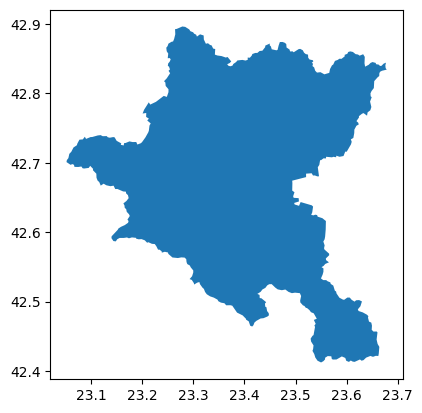

In [12]:
# let's cut each raster according to the sofia boundaries shapefile so as to decrease the size of the dataset

import geopandas as gpd
from shapely.geometry import box

sofia = gpd.read_file('shapefiles/sofia-boundaries.json')

sofia.plot()
plt.show()


In [13]:
# now we clip 

def clip_raster(image_path, shapefile_path):
    with rio.open(image_path) as src:
        out_image, out_transform = rio.mask.mask(src, shapefile_path, crop=True, nodata=np.nan)
        out_meta = src.meta.copy()
        print(out_image.shape)
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})
        return out_image, out_meta
# with rio.open('data/images/LC08_184030_20141001.tif') as src:
#     print(src.crs)
#     sofia = sofia.to_crs(src.crs)

# out_image, out_meta = clip_raster('data/images/LC08_184030_20141001.tif', sofia.geometry)


In [10]:
import os
import rasterio as rio

# Ensure the directory exists
output_dir = './data/clipped/'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in image_info
for i, row in image_info.iterrows():
    image_path = f'data/images/{row["id"]}.tif'
    # lets set the missing values to np.nan
    out_image, out_meta = clip_raster(image_path, sofia.geometry)
    out_meta.update({'driver': 'GTiff', 'count': out_image.shape[0]})
    
    output_file = f'{output_dir}{row["id"]}.tif'
    with rio.open(output_file, 'w', **out_meta) as dst:
        dst.write(out_image)
    
    print(f'Image {row["id"]} clipped and saved to {output_file}')

(9, 444, 427)
Image LE07_184030_19990930 clipped and saved to ./data/clipped/LE07_184030_19990930.tif
(9, 444, 427)
Image LE07_184030_20010919 clipped and saved to ./data/clipped/LE07_184030_20010919.tif
(9, 444, 427)
Image LT05_184030_19990415 clipped and saved to ./data/clipped/LT05_184030_19990415.tif
(9, 444, 427)
Image LE07_184030_20000527 clipped and saved to ./data/clipped/LE07_184030_20000527.tif
(9, 444, 427)
Image LE07_184030_20000612 clipped and saved to ./data/clipped/LE07_184030_20000612.tif
(9, 444, 427)
Image LE07_184030_20000628 clipped and saved to ./data/clipped/LE07_184030_20000628.tif
(9, 444, 427)
Image LT05_184030_20000128 clipped and saved to ./data/clipped/LT05_184030_20000128.tif
(9, 444, 427)
Image LT05_184030_20061027 clipped and saved to ./data/clipped/LT05_184030_20061027.tif
(9, 444, 427)
Image LT05_184030_20070928 clipped and saved to ./data/clipped/LT05_184030_20070928.tif
(9, 444, 427)
Image LT05_184030_20060504 clipped and saved to ./data/clipped/LT05_

(120.0, 120.0)


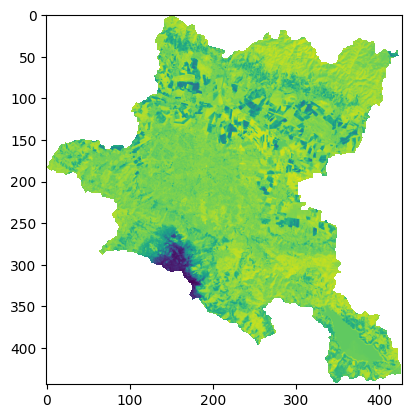

In [16]:
# now lets check out a clipped image

with rio.open('data/clipped/LC08_184030_20140323.tif') as src:
    clipped = src.read()
    print(src.res)
    plt.imshow(clipped[0])


In [24]:
# aand we now we are going to make a dataset from the clipped images

ds_clipped = pd.DataFrame(columns=['NDBI', 'NDBaI',	'MNDWI',
                                    'NDWI',	'NDVI',	'EVI',	'SAVI',
                                    'population_count', 'LST', 'season'])

data_frames = []

for i, row in image_info.iterrows():
    image_path = f'data/clipped/{row["id"]}.tif'
    season = row['season']
    image = flatten_image(image_path, season)
    data_frames.append(pd.DataFrame(image, columns=ds_clipped.columns))

ds_clipped = pd.concat(data_frames, ignore_index=True)


In [18]:
#ds_clipped.to_csv('data/dataset_clipped.csv', index=False)
ds_clipped = pd.read_csv('data/dataset_clipped.csv')

In [19]:
ds_clipped.head()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST,season
0,-0.093513,-0.531942,-0.177352,-0.266447,0.278387,2.719549,0.417573,0.0,21.707167,autumn
1,-0.150051,-0.578637,-0.124427,-0.269447,0.290061,4.749510,0.435082,0.0,18.709564,autumn
2,-0.161222,-0.568673,-0.136485,-0.291297,0.313857,4.000525,0.470776,0.0,19.003513,autumn
3,-0.148011,-0.556405,-0.153642,-0.294946,0.313806,3.395727,0.470699,0.0,19.160742,autumn
4,-0.134178,-0.556440,-0.149853,-0.278432,0.292765,3.290710,0.439138,0.0,18.911226,autumn


In [20]:
ds_clipped.describe()

,NDBI,NDBaI,MNDWI,NDWI,NDVI,EVI,SAVI,population_count,LST
count,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06,2.502753e+06
mean,-9.791949e-02,-5.090657e-01,-1.268181e-01,-2.205298e-01,2.194965e-01,1.907143e+00,3.292385e-01,9.845104e+00,2.163251e+01
std,1.305249e-01,8.420014e-02,1.694996e-01,1.219830e-01,1.358875e-01,4.047148e+01,2.038279e-01,2.829453e+01,1.287958e+01
min,-7.510781e-01,-7.178239e-01,-3.652826e-01,-5.300561e-01,-3.975135e-01,-1.747000e+04,-5.962671e-01,0.000000e+00,-2.350982e+01
25%,-1.686622e-01,-5.449088e-01,-2.090733e-01,-3.060457e-01,1.313066e-01,1.072244e+00,1.969561e-01,0.000000e+00,1.775594e+01
50%,-7.928818e-02,-5.150021e-01,-1.777621e-01,-2.295412e-01,2.222222e-01,1.824953e+00,3.333268e-01,0.000000e+00,2.387419e+01
75%,-5.194450e-03,-4.856491e-01,-1.318869e-01,-1.526665e-01,3.192484e-01,2.721433e+00,4.788630e-01,1.001031e+00,3.002663e+01
max,3.141035e-01,3.749371e-01,7.599667e-01,3.801346e-01,5.651053e-01,2.000000e+04,8.476468e-01,3.831139e+02,6.314724e+01


In [27]:
# ds_clipped = ds_clipped.replace("nan", np.nan)

In [28]:
ds_clipped = ds_clipped.dropna()

In [6]:
# print(ds_clipped.shape)
# ds_clipped.replace('nan', np.nan, inplace=True)

In [24]:
#ds_clipped.dropna(inplace=True)
ds_clipped.shape

(2502753, 10)

In [25]:
# let's see how many records we have per season
ds_clipped['season'].value_counts()

season
autumn    741281
summer    726797
spring    689240
winter    345435
Name: count, dtype: int64

In [33]:
ds_nominal = ds_clipped.copy()

# lets encode the season column as a categorical variable
ds_clipped = ds_clipped.join(pd.get_dummies(ds_clipped['season'], prefix='season'))
ds_clipped.drop('season', axis=1, inplace=True) 


In [43]:
#let's leave only the summer season

temp = ds_clipped[ds_clipped['season_summer'] == 1]
summer = temp.drop('season_summer', axis=1)
summer.drop('season_autumn', axis=1, inplace=True)
summer.drop('season_spring', axis=1, inplace=True)
summer.drop('season_winter', axis=1, inplace=True)

In [26]:
def plot_correlation(ds=ds_clipped):
    corr = ds.corr()
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()

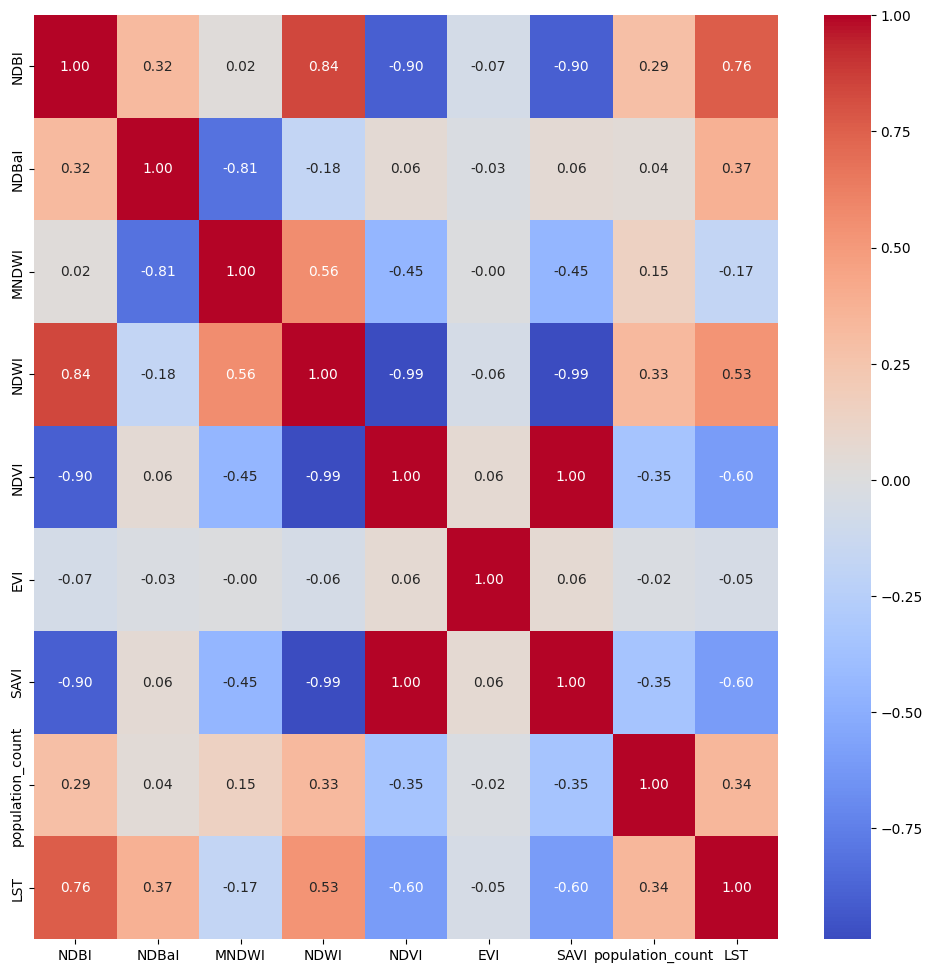

In [55]:
plot_correlation(summer)

In [51]:
temp_w = ds_clipped[ds_clipped['season_winter'] == 1]
winter = temp_w.drop('season_winter', axis=1)
winter.drop('season_autumn', axis=1, inplace=True)
winter.drop('season_spring', axis=1, inplace=True)
winter.drop('season_summer', axis=1, inplace=True)

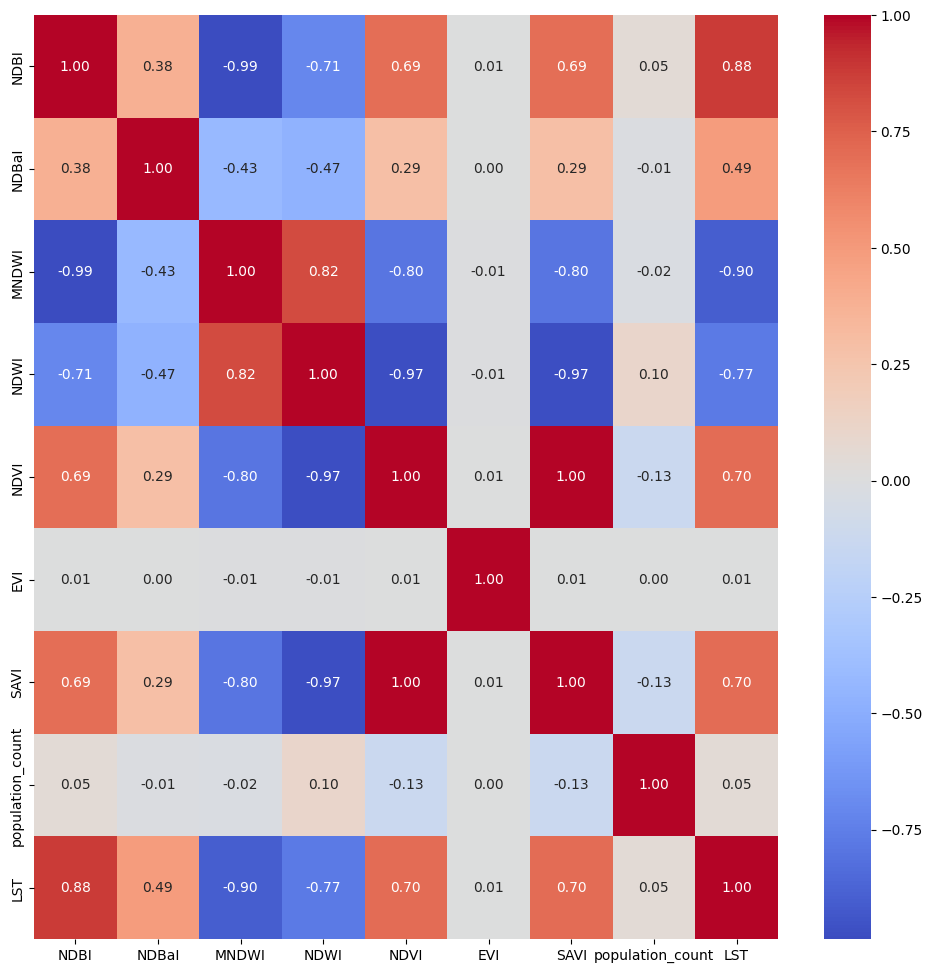

In [56]:
plot_correlation(winter)

In [53]:
temp_spr = ds_clipped[ds_clipped['season_spring'] == 1]
spring = temp_spr.drop('season_spring', axis=1)
spring.drop('season_autumn', axis=1, inplace=True)
spring.drop('season_winter', axis=1, inplace=True)
spring.drop('season_summer', axis=1, inplace=True)

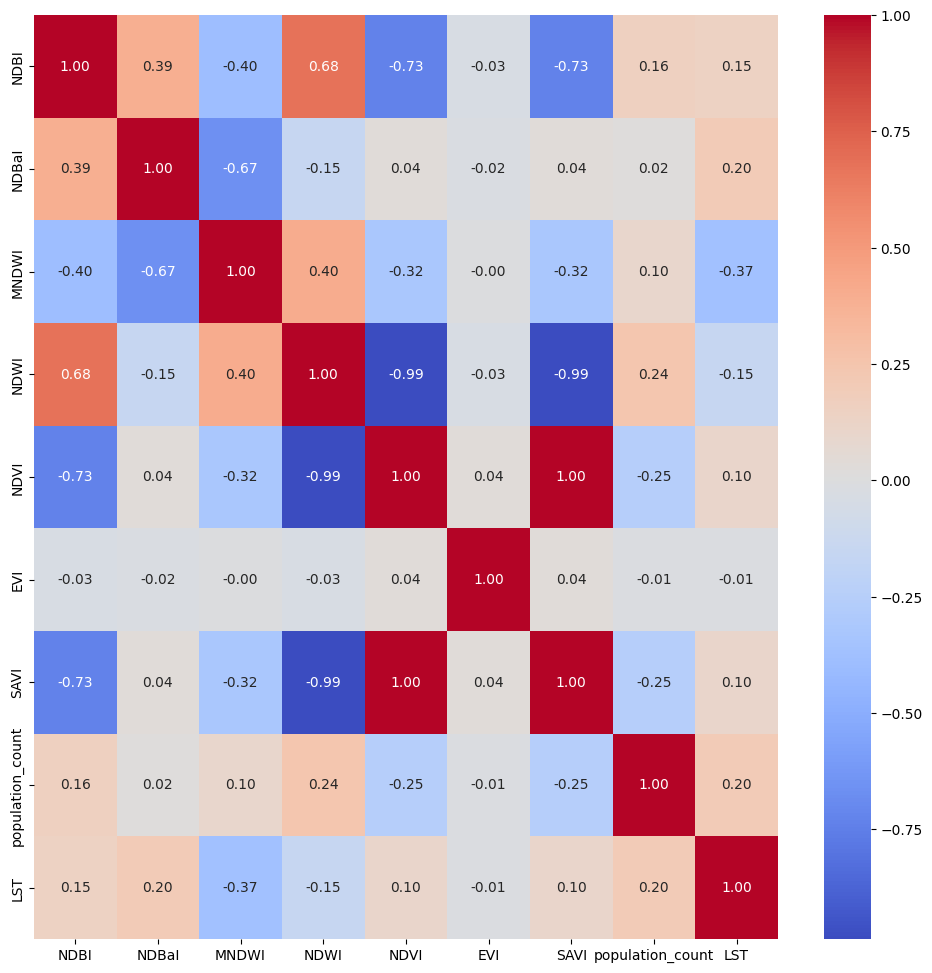

In [57]:
plot_correlation(spring)

In [61]:
temp_a = ds_clipped[ds_clipped['season_autumn'] == 1]
autumn = temp_spr.drop('season_autumn', axis=1)
autumn.drop('season_spring', axis=1, inplace=True)
autumn.drop('season_winter', axis=1, inplace=True)
autumn.drop('season_summer', axis=1, inplace=True)

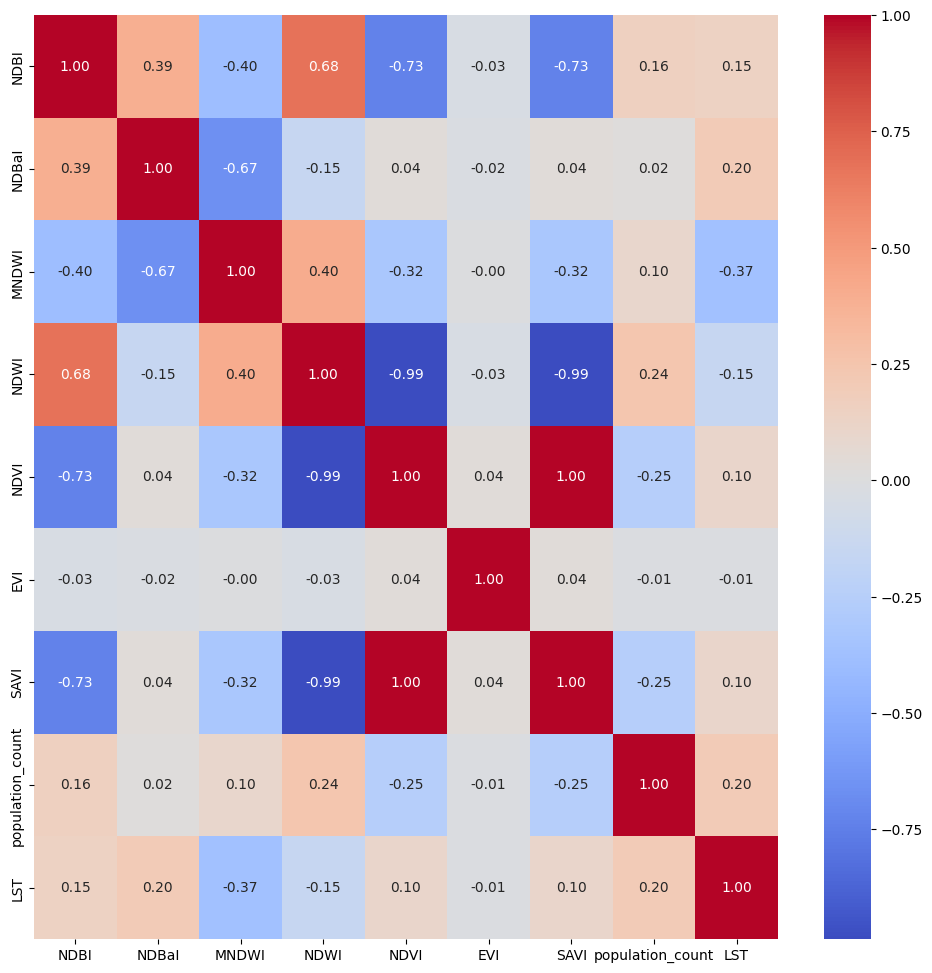

In [62]:
plot_correlation(autumn)